In [1]:
import pandas as pd

### Feature Engineering

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       Feature Engineering is a process of creating new features or tranforming your existing features to get the most out of your data.
   </font>
</p>

### Feature Creation

In [7]:
data_df = pd.read_csv(r"D:/Artificial_Intelligence/nat_lang_proc/data/SMSSpamCollection.tsv", delimiter="\t", header=None)
data_df.columns = ["labels", "body_text"]
data_df.head()

,labels,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       Feature creation requires us to think what new features might contribute to our model. Below are some examples hypothesis that we can think of.<br>
       <b>Creating a feature using text message length:</b><br>
       We are going to work under hypothesis that sapm messages tend to be longer than real text messages.
   </font>
</p>


In [8]:
data_df["body_len"] = data_df["body_text"].apply(lambda x: len(x) - x.count(" "))
data_df.head()

,labels,body_text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       <b>Creating feature for % of text that is punctuation:</b><br>
       We are going to work under hypothesis that real text messages use less punctuation than spam.
   </font>
</p>

In [10]:
import string
def puct_count(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3) * 100

data_df["punct%"] = data_df["body_text"].apply(puct_count)
data_df.head()

,labels,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


### Feature Evaluation

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       We are checking newly added features adding value or not to the models
   </font>
</p>

In [11]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

In [12]:
bins = np.linspace(0, 200, 40)
bins

array([  0.        ,   5.12820513,  10.25641026,  15.38461538,
        20.51282051,  25.64102564,  30.76923077,  35.8974359 ,
        41.02564103,  46.15384615,  51.28205128,  56.41025641,
        61.53846154,  66.66666667,  71.79487179,  76.92307692,
        82.05128205,  87.17948718,  92.30769231,  97.43589744,
       102.56410256, 107.69230769, 112.82051282, 117.94871795,
       123.07692308, 128.20512821, 133.33333333, 138.46153846,
       143.58974359, 148.71794872, 153.84615385, 158.97435897,
       164.1025641 , 169.23076923, 174.35897436, 179.48717949,
       184.61538462, 189.74358974, 194.87179487, 200.        ])

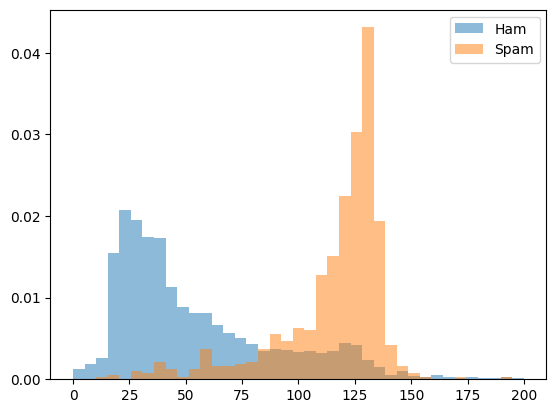

In [13]:
pyplot.hist(data_df[data_df["labels"]=="ham"]["body_len"], bins, alpha=0.5, label="Ham", density=True)
pyplot.hist(data_df[data_df["labels"]=="spam"]["body_len"], bins, alpha=0.5, label="Spam", density=True)
pyplot.legend(loc="upper right")
pyplot.show()

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       From the above graph we can conclude that most of the spam messages have more length than the ham messages. So we can say this feature contributing to our model.
   </font>
</p>

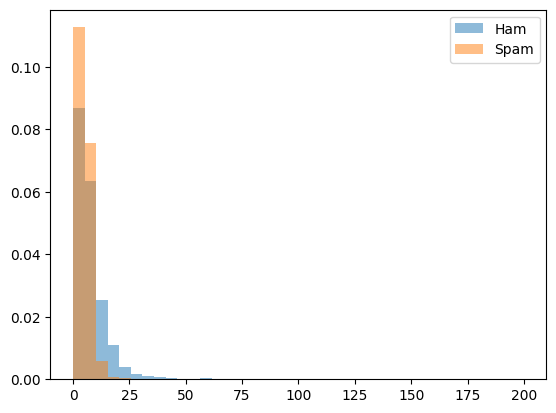

In [14]:
pyplot.hist(data_df[data_df["labels"]=="ham"]["punct%"], bins, alpha=0.5, label="Ham", density=True)
pyplot.hist(data_df[data_df["labels"]=="spam"]["punct%"], bins, alpha=0.5, label="Spam", density=True)
pyplot.legend(loc="upper right")
pyplot.show()

So, from above the graph we can conclude that punctuation percentage not contributing that much to our model.

### Transformations

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       Before applying transformations, to get some idea about newly created features we are going to plot full distributions.
   </font>
</p>

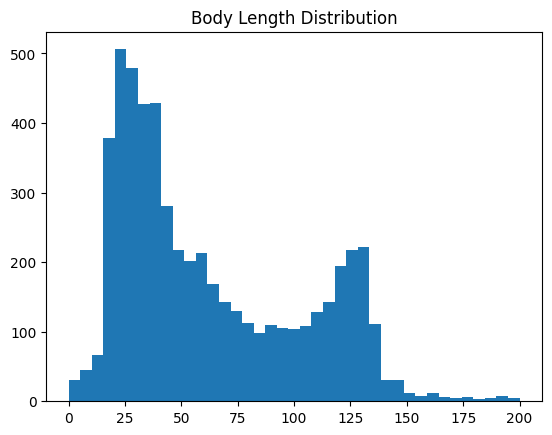

In [16]:
bins = np.linspace(0, 200, 40)
pyplot.hist(data_df["body_len"], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       In the above graph, we don't see much skew or outlier points to apply transformations
   </font>
</p>

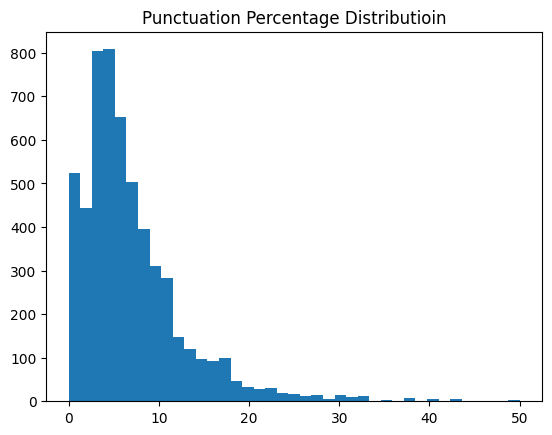

In [17]:
bins = np.linspace(0, 50, 40)
pyplot.hist(data_df["punct%"], bins)
pyplot.title("Punctuation Percentage Distributioin")
pyplot.show()

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       We can see a clear skew (between 10 to 20 points) and some points extended upto 50. These points might be outliers. A model might dig too much into this skewed tail over here and generate a model maybe little bit biased. We're going to focus on this feature for our transformations.
   </font>
</p>

#### Transformation Process

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       Transformation is a process that alter each data point in certain column in a systematic way.
   </font>
</p>
 

<img src="box_cox_power_transformations.png" alt="box_cox_power" style="width: 600px;"/>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
        Transformation usally include below three steps:
        <ul>
            <li>Determine what range of exponents to test</li>
            <li>Apply each transformation to each value of your choosen feature</li>
            <li>Use some criteria to determine which of the transformation yield the best distribution</li>
       </ul>
   </font>
</p>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       Earlier we have dicussed that punct% feature needs some transformations. We will plot different hist plots to identify with exponents gives best distributions. 
   </font>
</p>

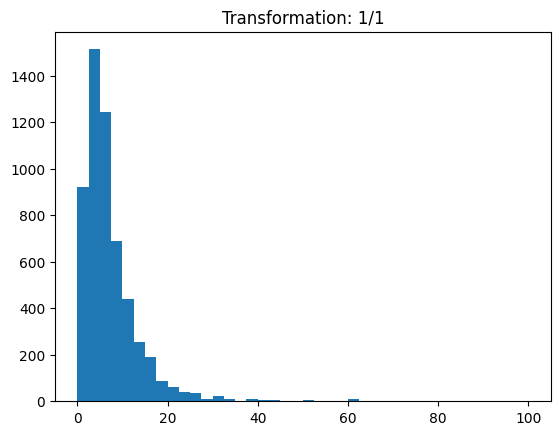

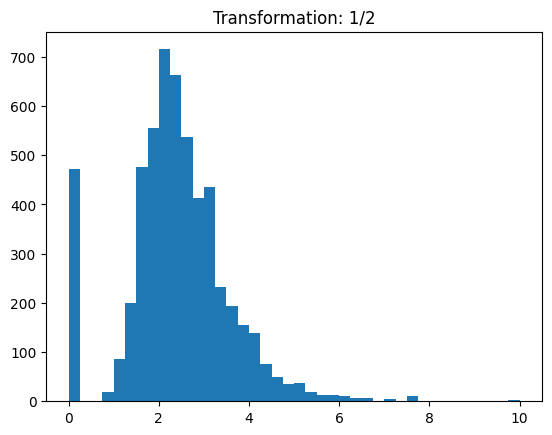

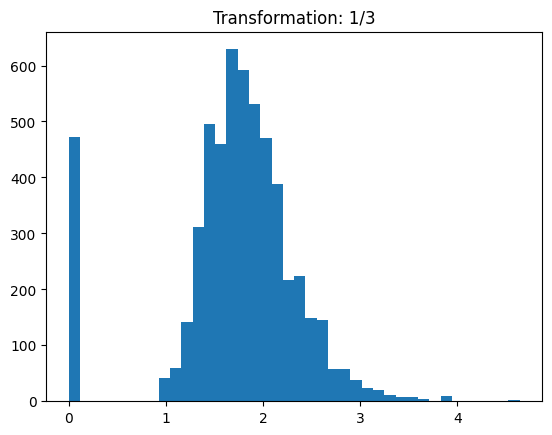

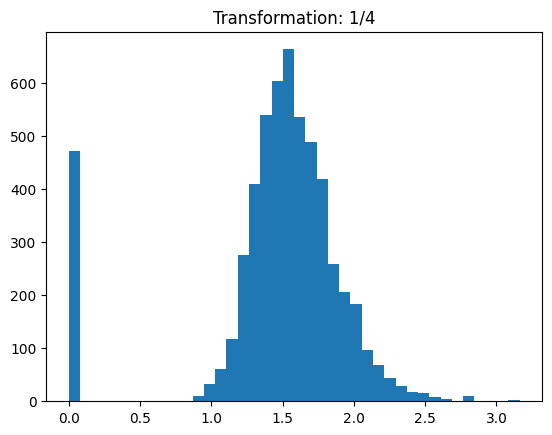

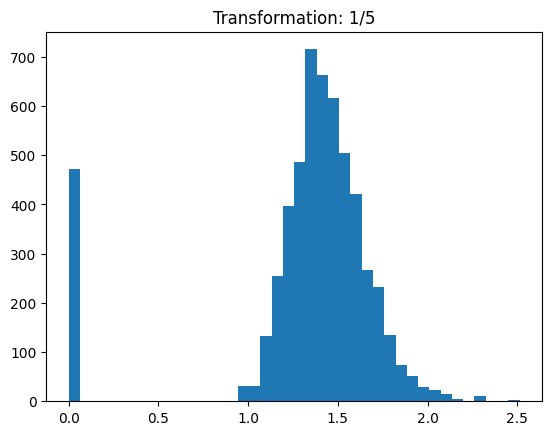

In [20]:
for i in [1, 2, 3, 4, 5]:
    pyplot.hist(data_df["punct%"]**(1/i), bins=40)
    pyplot.title(F"Transformation: 1/{i}")
    pyplot.show()

Transformation 1/4 and 1/5 are having some good distributions